* An image is a function where $f(x,y)$ gives the intensity or value at position $(x,y)$

* A color image has 3 functions stacked together. Therefore, $f(x,y) = \begin{bmatrix} r(x,y) \\ g(x,y) \\ b(x,y) \end{bmatrix}$

* With a grayscale image, we can define an image as a function where,
$ f : [x_{min}, x_{max}] x [y_{min}, y_{max}] \rightarrow [i_{min}, i_{max}] $ when $ x \in R, y \in R, i \in R $. <br>
x represents the width, y represents the height, and i represents the color intensity.

# Load and display an image using opencv for python

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
img_root_path = './../../course_images/'

In [2]:
img = cv2.imread(img_root_path + 'dolphin.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

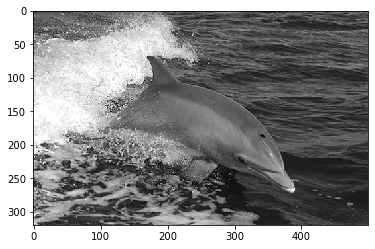

In [3]:
plt.imshow(img, cmap = 'gray')
plt.show()

# Image Size

In [4]:
img.shape # (height, width)

(320, 500)

# Data type of an image

In [5]:
type(img[0,0])

numpy.uint8

# Image value at a single pixel

In [6]:
# Pixel location (u,v) = (50, 100)
img[49,99]

208

# Image values for an entire row

In [7]:
img[49,:]

array([ 88,  83, 126, 120,  92, 231, 236, 199, 227, 245, 213, 178, 145,
       109, 158, 181, 178, 220, 207, 176, 182, 174, 165, 161, 159, 166,
       176, 181, 187, 191, 176, 162, 191, 186, 190, 203, 199, 172, 163,
       180, 200, 207, 195, 185, 189, 187, 198, 200, 184, 202, 213, 189,
       176, 207, 209, 198, 187, 182, 189, 197, 213, 236, 220, 227, 252,
       238, 220, 201, 204, 227, 205, 220, 230, 227, 219, 202, 192, 208,
       228, 214, 205, 212, 202, 204, 202, 186, 198, 211, 198, 192, 200,
       209, 218, 215, 200, 203, 200, 213, 224, 208, 211, 229, 213, 217,
       233, 218, 199, 219, 241, 232, 222, 221, 245, 239, 246, 224, 211,
       211, 217, 227, 249, 249, 234, 242, 250, 232, 234, 230, 206, 200,
       233, 244, 233, 237, 224, 222, 233, 250, 247, 238, 234, 228, 240,
       225, 238, 247, 238, 235, 230, 223, 241, 230, 244, 245, 245, 240,
       226, 237, 255, 246, 228, 250, 247, 240, 237, 214, 228, 197, 229,
       248, 222, 224, 249, 250, 251, 239, 244, 243, 224, 203, 22

# Plotting the entire row values

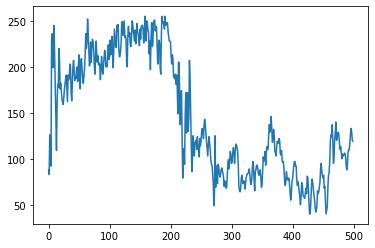

In [8]:
plt.plot(img[49,:])
plt.show()

Now, we can print out a sub-region inside the image.

In [9]:
# Extract a 2D slice between rows 101 to 103 and columns 201 to 203 (inclusive)
img[100:103, 200:203]

array([[81, 77, 77],
       [81, 78, 76],
       [82, 79, 77]], dtype=uint8)

# Cropping an image

(320, 500)


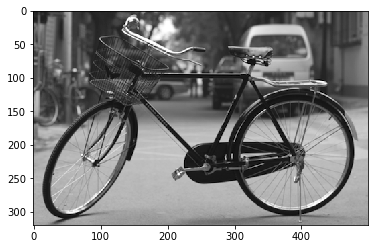

In [10]:
img2 = cv2.imread(img_root_path + 'bicycle.png', cv2.IMREAD_GRAYSCALE)
print(img2.shape)
plt.imshow(img2, cmap='gray')
plt.show()

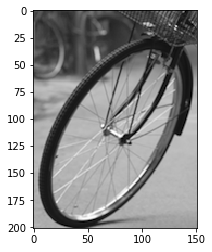

In [11]:
# crop the region rows {110:310} and columns {10:160}
cropped_img2 = img2[109:310, 9:160]
plt.imshow(cropped_img2, cmap='gray')
plt.show()

# Color images

(258, 320, 3)


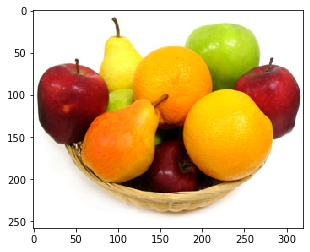

In [12]:
color_img = cv2.imread(img_root_path + 'fruit.png', cv2.IMREAD_COLOR)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
print(color_img.shape)
plt.imshow(color_img)
plt.show()

(258, 320)


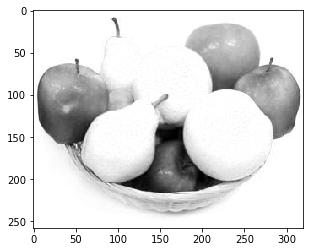

In [13]:
# red channel in the image only
red_channel = color_img[:,:,0]
print(red_channel.shape)
plt.imshow(red_channel, cmap='gray')
plt.show()

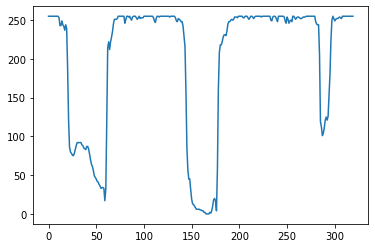

In [14]:
# plot the red channel
plt.plot(red_channel[149,:])
plt.show()

# Adding two images

(320, 500)


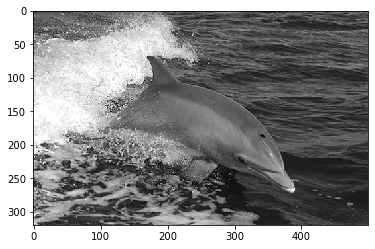

(320, 500)


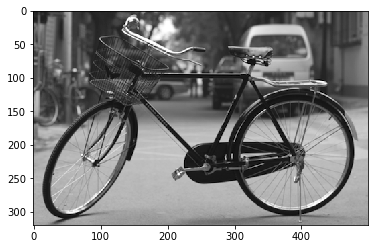

In [15]:
print(img.shape) # dolphin
plt.imshow(img, cmap = 'gray')
plt.show()
print(img2.shape) # bicycle
plt.imshow(img2, cmap = 'gray')
plt.show()

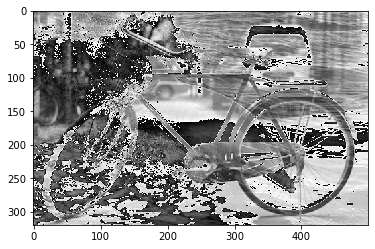

In [16]:
# sum of two images
summed = img + img2
plt.imshow(summed, cmap = 'gray')
plt.show()

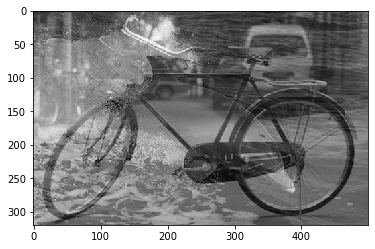

In [17]:
# average of the two images
average = img/2 + img2/2
plt.imshow(average, cmap = 'gray')
plt.show()

# Multiply by a scalar value

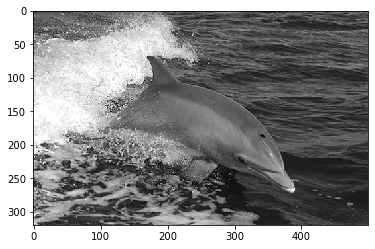

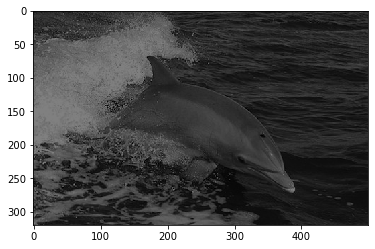

In [18]:
# original dolphin image
plt.imshow(img, cmap='gray')
plt.show()
# half the intensity of the original image
img_half = 0.5 * img
plt.imshow(img_half, cmap='gray', vmin=0, vmax=255)
# matplotlib imshow automatically normalizes values to [0,1]. 
# reference @ https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html
plt.show()

# Defining a function to blend two images

In [19]:
def blend_img(img1, img2, ratio):
    # 0 <= ratio <= 1
    return ratio * img1 + (1-ratio) * img2

# Blending two images

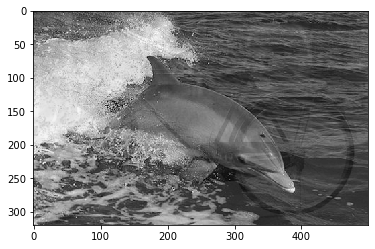

In [20]:
blended_img = blend_img(img, img2, 0.85)
plt.imshow(blended_img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Noise in an image

Noise is just another function that is combined with the original function to get a new function.  
    $\overrightarrow{\rm I^{'}}(x,y) = \overrightarrow{\rm I}(x,y) + \overrightarrow{\rm \eta}(x,y)$  
### Common types of noise
* Salt and pepper noise: random occurrences of black and white pixels
* Impulse noise: random occurences of white pixels
* Gaussian noise: variations in intensity drawn from a Gaussian normal distribution

# Preserve Image Difference

When images have a data type of uint8, it only bounds to [0,255]. When we are subtracting one image from another, say $imgA - imgB$, any values that are less than 0 will become 0.  
Therefore, we just want to figure out the absolute difference between two images. However, $abs(imgA - imgB)$ will not work since the expression inside the absolute function already bounds to 0.  
Therefore, to preserve image difference, we should use...  
* $(imgA - imgB) + (imgB - imgA)$ or
* type converting to floating points

# Generating Gaussian noise

In [21]:
import numpy as np

np.random.seed(999)
mean, std = 0, 1
noise = np.random.normal(mean, std, (1,1000))
noise_hist, bins = np.histogram(noise, bins=np.linspace(-3,3,num=21))
print(noise_hist)
print(bins)

[  2   7   7  21  28  48  73  86 110 107 124 112  91  62  46  30  18  15
   3   1]
[-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
  1.2  1.5  1.8  2.1  2.4  2.7  3. ]


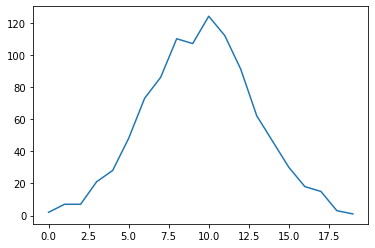

In [22]:
plt.plot(noise_hist) # ignore the bottom x-axis values.
plt.show()